In [64]:
import pandas as pd

In [65]:
df = pd.read_csv(r"C:\Users\Challa Karthik\Desktop\internship\housepricedata.csv")

In [66]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [67]:
dataset = df.values #converting into arrays

In [68]:
dataset #to check what is inside the dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [69]:
X = dataset[:,0:10] #We now split our dataset into input features (X) and the feature we wish to predict (Y). To do that split, we simply assign the first 10 columns of our array to a variable called X 
#and the last column of our array to a variable called Y
# means to take all the rows in dataset and put it in X.

In [70]:
Y = dataset[:,10]

In [71]:
from sklearn import preprocessing

In [72]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
#we use a function called the min-max scaler, which scales the dataset so that all the input features lie between 0 and 1 inclusive

c:\users\challa karthik\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [73]:
#scaled data is stored in array X_scale
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [74]:
# split our dataset into a training set, a validation set and a test set.
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y , test_size= 0.3)
#This tells scikit-learn that your val_and_test size will be 30% of the overall dataset
#The code will store the split data into the first four variables on the left of the equal sign as the variable names suggest

In [76]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [77]:
# #The code above will split the val_and_test size equally to the validation set and the test set.
# In summary, we now have a total of six variables for our datasets we will use:

# X_train (10 input features, 70% of full dataset)
# X_val (10 input features, 15% of full dataset)
# X_test (10 input features, 15% of full dataset)
# Y_train (1 label, 70% of full dataset)
# Y_val (1 label, 15% of full dataset)
# Y_test (1 label, 15% of full dataset)

In [78]:
#If you want to see how the shapes of the arrays are for each of them (i.e. what dimensions they are), simply run
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape,Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [79]:
# Summary: In processing the data, we’ve:

# Read in the CSV (comma separated values) file and convert them to arrays.
# Split our dataset into the input features and the label.
# Scale the data so that the input features have similar orders of magnitude.
# # Split our dataset into the training set, the validation set and the test set.

In [80]:
from keras.models import Sequential
from keras.layers import Dense


In [81]:
#specifying our keras Sequential model in this way
model = Sequential ([
    Dense(32, activation = 'relu',input_shape = (10,) ),
    Dense(32, activation = 'relu'),
    Dense(1, activation='sigmoid' ),
])
#code can be interpreted like this - model = Sequential([ ... ])
#This says that we will store our model in the variable ‘model’, 
#and we’ll describe it sequentially (layer by layer) in between the square brackets.
#Dense(32, activation='relu', input_shape=(10,)),-
#We have our first layer as a dense layer with 32 neurons,
#ReLU activation and the input shape is 10 since we have 10 input features. Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.
#Dense(32, activation='relu'),

#Our second layer is also a dense layer with 32 neurons, ReLU activation. 
#Note that we do not have to describe the input shape since Keras can infer from the output of our first layer.\
# Dense(1, activation='sigmoid') -Our third layer is a dense layer with 1 neuron, sigmoid activation.

#And just like that, we have written our model architecture (template) in code!

In [82]:
# Second Step: Filling in the best numbers
# Now that we’ve got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by

# Telling it which algorithm you want to use to do the optimization
# Telling it what loss function to use
# Telling it what other metrics you want to track apart from the loss function
# Configuring the model with these settings requires us to call the function model.compile, like this:

In [83]:
model.compile(optimizer="sgd", loss = "binary_crossentropy", metrics = ['accuracy'])

In [84]:
# We put the following settings inside the brackets after model.compile:

# optimizer='sgd'

# ‘sgd’ refers to stochastic gradient descent (over here, it refers to mini-batch gradient descent), which we’ve seen in Intuitive Deep Learning Part 1b.

# loss='binary_crossentropy'

# The loss function for outputs that take the values 1 or 0 is called binary cross entropy.

# metrics=['accuracy'

In [85]:
#training the data
history = model.fit(X_train, Y_train, batch_size = 32, epochs = 10 , validation_data = (X_val,Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/10
1022/1022 [==============================] - 0s 416us/step - loss: 0.6793 - acc: 0.5245 - val_loss: 0.6670 - val_acc: 0.6256
Epoch 2/10
1022/1022 [==============================] - 0s 41us/step - loss: 0.6742 - acc: 0.5773 - val_loss: 0.6624 - val_acc: 0.6941
Epoch 3/10
1022/1022 [==============================] - 0s 42us/step - loss: 0.6695 - acc: 0.6585 - val_loss: 0.6586 - val_acc: 0.7626
Epoch 4/10
1022/1022 [==============================] - 0s 40us/step - loss: 0.6651 - acc: 0.6986 - val_loss: 0.6551 - val_acc: 0.7808
Epoch 5/10
1022/1022 [==============================] - 0s 53us/step - loss: 0.6610 - acc: 0.7378 - val_loss: 0.6514 - val_acc: 0.7900
Epoch 6/10
1022/1022 [==============================] - 0s 36us/step - loss: 0.6570 - acc: 0.7476 - val_loss: 0.6477 - val_acc: 0.7945
Epoch 7/10
1022/1022 [==============================] - 0s 51us/step - loss: 0.6530 - acc: 0.7632 - val_loss: 0.6437 - val_acc: 0.8037
Epoch 8

In [86]:
model.evaluate(X_test, Y_test)[1]
#The reason why we have the index 1 after the model.evaluate function is because the function returns the loss 
#as the first element and the accuracy as the second element. To only output the accuracy, 
#simply access the second element (which is indexed by 1, since the first element starts its indexing from 0).

219/219 [==============================] - 0s 27us/step


0.7762557047687165

In [87]:
# Due to the randomness in how we have split the dataset as well as the initialization of the weights, 
#the numbers and graph will differ slightly each time we run our notebook. 
#Nevertheless, you should get a test accuracy anywhere between 80% to 95% if you’ve followed the architecture 
#I specified above!

In [88]:
# Summary: Coding up our first neural network required only a few lines of code:

# We specify the architecture with the Keras Sequential model.
# We specify some of our settings (optimizer, loss function, metrics to track) with model.compile
# We train our model (find the best parameters for our architecture) with the training data with model.fit
# We evaluate our model on the test set with model.evaluate

In [89]:
#visulaising loss and accuracy
import matplotlib.pyplot as plt


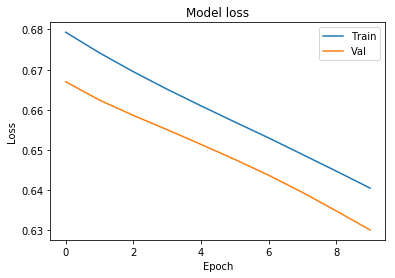

In [90]:
#here we want to visulaise the training loss and visualising loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [91]:
# The first two lines says that we want to plot the loss and the val_loss.
# The third line specifies the title of this graph, “Model Loss”.
# The fourth and fifth line tells us what the y and x axis should be labelled respectively. 
# The sixth line includes a legend for our graph, and the location of the legend will be in the upper right.
# And the seventh line tells Jupyter notebook to display the graph.

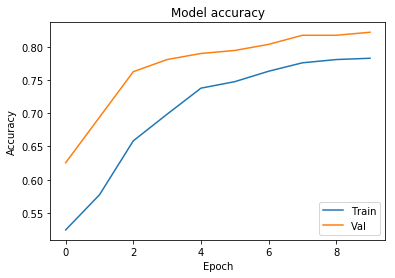

In [92]:
#plotting training accuracy and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [93]:
# Since the improvements in ur model to the training set looks somewhat matched up with improvements to the validation set, 
# it doesn’t seem like overfitting is a huge problem in our model.

# Summary: We use matplotlib to visualize the training and validation loss / accuracy over time to see 
#     if there’s overfitting in our model.

In [94]:
# #adding regularization to the neural network
# For the sake of introducing regularization to our neural network, 
# let’s formulate with a neural network that will badly overfit on our training set. We’ll call this Model 2.

In [95]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/10
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5148 - acc: 0.7368 - val_loss: 0.3635 - val_acc: 0.8402
Epoch 2/10
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3889 - acc: 0.8415 - val_loss: 0.2581 - val_acc: 0.8904
Epoch 3/10
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3395 - acc: 0.8620 - val_loss: 0.2228 - val_acc: 0.9178
Epoch 4/10
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3096 - acc: 0.8738 - val_loss: 0.2984 - val_acc: 0.8813
Epoch 5/10
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2921 - acc: 0.8757 - val_loss: 0.2801 - val_acc: 0.8904
Epoch 6/10
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2891 - acc: 0.8777 - val_loss: 0.2236 - val_acc: 0.9087
Epoch 7/10
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2544 - acc: 0.8924 - val_loss: 0.2937 - val_acc: 0.8904
Epoch 8/10
1022

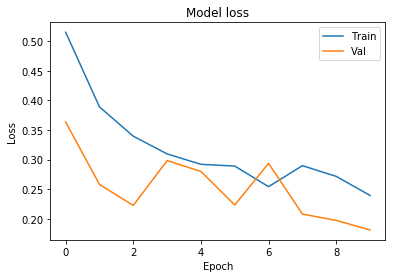

In [96]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#This is a clear sign of over-fitting.
#The training loss is decreasing, but the validation loss is way above the training loss and increasing

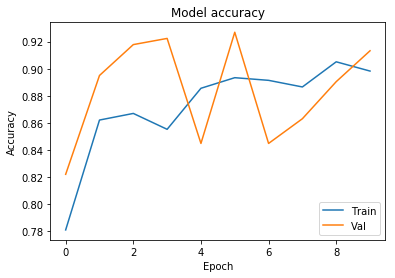

In [97]:
#plotting the accuracy now
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
#We can see a clearer divergence between train and validation accuracy as 

In [98]:
from keras.layers import Dropout
from keras import regularizers

In [100]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(rate=0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(rate=0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(rate=0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(rate=0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [101]:
# Can you spot the differences between Model 3 and Model 2? There are two main differences:

# Difference 1: To add L2 regularization, notice that we’ve added a bit of extra code in each of our dense layers like this:

# kernel_regularizer=regularizers.l2(0.01)

# This tells Keras to include the squared values of those parameters in our overall loss function, and weight them by 0.01 in the loss function.

# Difference 2: To add Dropout, we added a new layer like this:

# Dropout(0.3),

# This means that the neurons in the previous layer has a probability of 0.3 in dropping out during training. Let’s compile it and run it with the same parameters as our Model 2 (the overfitting one):

In [102]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 5s 5ms/step - loss: 14.7202 - acc: 0.6096 - val_loss: 4.0213 - val_acc: 0.7717
Epoch 2/100
1022/1022 [==============================] - 4s 3ms/step - loss: 1.7356 - acc: 0.8063 - val_loss: 0.5820 - val_acc: 0.9087
Epoch 3/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.5840 - acc: 0.8503 - val_loss: 0.4536 - val_acc: 0.8995
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5479 - acc: 0.8415 - val_loss: 0.4415 - val_acc: 0.9132
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5154 - acc: 0.8611 - val_loss: 0.4148 - val_acc: 0.9132
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5078 - acc: 0.8689 - val_loss: 0.4008 - val_acc: 0.9178
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5051 - acc: 0.8581 - val_loss: 0.4024 - val_acc: 0.9224
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4525 - acc: 0.8757 - val_loss: 0.3705 - val_acc: 0.9178
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4645 - acc: 0.8591 - val_loss: 0.3707 - val_acc: 0.9224
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4621 - acc: 0.8777 - val_loss: 0.3750 - val_acc: 0.9269
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4635 - acc: 0.8669 - val_loss: 0.3951 - val_acc: 0.9087
Epoch 65/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4465 - acc: 0.8816 - val_loss: 0.3821 - val_acc: 0.9132
Epoch 66/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4682 - acc: 0.8601 - val_loss: 0.3891 - val_acc: 0.9269
Epoch 67/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4618 - acc: 0.8650 - val_loss: 0.3819 - val_acc: 0.9132
Epoch 68/100
1022/1022 [========================

In [104]:
# And now, let’s plot the loss and accuracy graphs. You’ll notice that the loss is a lot higher at the start, and that’s because we’ve changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting:

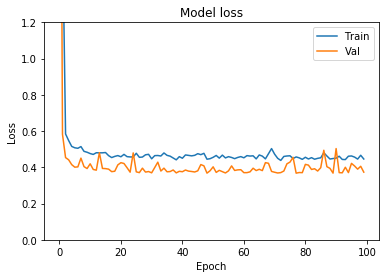

In [105]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

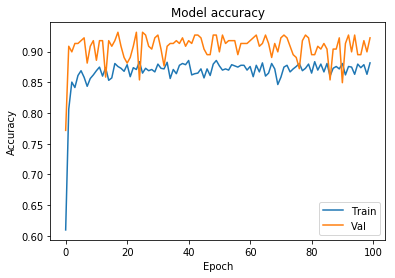

In [106]:
#plot the accuracy with similar code snippet:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# compared to our model in Model 2, we’ve reduced overfitting substantially! And that’s how we apply our regularization techniques to reduce overfitting to the training set.

# Summary: To deal with overfitting, we can code in the following strategies into our model each with about one line of code:

# L2 Regularization
# Dropout
# If we visualize the training / validation loss and accuracy, we can see that these additions have helped deal with overfitting!

# Consolidated Summary:
# In this post, we’ve written Python code to:

# Explore and Process the Data
# Build and Train our Neural Network
# Visualize Loss and Accuracy
# Add Regularization to our Neural Network
# We’ve been through a lot, but we haven’t written too many lines of code! Building and Training our Neural Network has only taken about 4 to 5 lines of code, and experimenting with different model architectures is just a simple matter of swapping in different layers or changing different hyperparameters. Keras has indeed made it a lot easier to build our neural networks, and we’ll continue to use it for more advanced applications in Computer Vision and Natural Language Processing.